## <b> [3단계] AI 모델링
---

## 1, 2 단계에서 진행하신 내용을 아래에 그대로 진행해주세요.

---

# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

In [155]:
#Tensorflow 설치하기
# %pip install tensorflow

* 데이터 프레임 관련 라이브러리

In [156]:
#라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import statsmodels.api as sm

import warnings
warnings.filterwarnings(action='ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import * # scaler
import joblib

### **나.  학습데이터 불러오기**

In [157]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import * 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_tree

In [158]:
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

    return fi_df

In [159]:
data = pd.read_csv('before_my_dataset.csv')

In [160]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [161]:
data.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),Result_v1
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,0.0,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,0.0,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,1
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,1.0,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,1
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,0.0,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,1
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,1


In [162]:
data.shape

(3231, 22)

### **다.  데이터 전처리**

In [163]:
target = 'Result_v1'
x = data.drop(target, axis=1)
y = data.loc[:, target]

### **라. train_test_split을 이용하여 train/test  데이터 분리**



In [164]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.25)

In [165]:
# train_test_split 사용

In [166]:
Scaler = MinMaxScaler()
x_train_s = Scaler.fit_transform(x_train)
x_val_s = Scaler.transform(x_val)

In [167]:
x_train.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,url_port,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a')
2179,80.0,0.0,64.0,16.0,16.0,4.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,3.0
114,19.0,0.0,0.0,19.0,19.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,183.0,1.0,1.0,1.0,564.0
1020,429.0,0.0,418.0,11.0,11.0,8.0,3.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
601,62.0,2.0,20.0,42.0,42.0,2.0,1.0,0.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,5.0,1.0,1.0,0.0,0.0
2890,17.0,0.0,0.0,17.0,17.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0


In [168]:
x_train.shape

(2423, 21)

### **마. Confusion Matrix 함수 정의**


#### Confusion Matrix란 Training 을 통한 Prediction 성능을 측정하기 위해 예측 value와 실제 value를 비교하기 위한 표입니다.
#### 아래 함수는 이번 과제에서 confusion matrix 결과를 보기 쉽게 표현한 것으로 사용 예를 참고하여 모델 결과 확인에 사용하시기 바랍니다.



**<span style="color:green">[참고링크] 공식 Document**</span>
 
* confusion matrix(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [169]:
from sklearn.metrics import classification_report as creport
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [170]:
def plot_confusion_matrix(ax, matrix, labels = ['malicious','benign'], title='Confusion matrix', fontsize=9):
    ax.set_xticks([x for x in range(len(labels))])
    ax.set_yticks([y for y in range(len(labels))])

    # Place labels on minor ticks
    ax.set_xticks([x + 0.5 for x in range(len(labels))], minor=True)
    ax.set_xticklabels(labels, rotation='90', fontsize=fontsize, minor=True)
    ax.set_yticks([y + 0.5 for y in range(len(labels))], minor=True)
    ax.set_yticklabels(labels[::-1], fontsize=fontsize, minor=True)

    # Hide major tick labels
    ax.tick_params(which='major', labelbottom='off', labelleft='off')

    # Finally, hide minor tick marks
    ax.tick_params(which='minor', width=0)

    # Plot heat map
    proportions = [1. * row / sum(row) for row in matrix]
    ax.pcolor(np.array(proportions[::-1]), cmap=plt.cm.Blues)

    # Plot counts as text
    for row in range(len(matrix)):
        for col in range(len(matrix[row])):
            confusion = matrix[::-1][row][col]
            if confusion != 0:
                ax.text(col + 0.5, row + 0.5, int(confusion),
                        fontsize=fontsize,
                        horizontalalignment='center',
                        verticalalignment='center')

    # Add finishing touches
    ax.grid(True, linestyle=':')
    ax.set_title(title, fontsize=fontsize)
    ax.set_xlabel('prediction', fontsize=fontsize)
    ax.set_ylabel('actual', fontsize=fontsize)

    plt.show()

### <span style="color:blue">[예시] Confusion Matrix 사용 방법<span>

- 샘플
#### > confusion = confusion_matrix(test_y, dt_pred)
#### > fig, ax = plt.subplots(figsize=(10,3))
#### > plot_confusion_matrix(ax, confusion, fontsize=30)


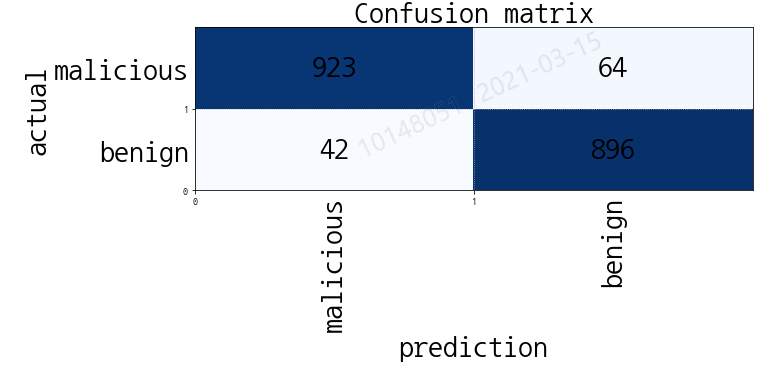

---

In [171]:
# 아래 함수는 로지스틱 회귀를 위한 전진선택법 함수 입니다.
import statsmodels.api as sm

def forward_stepwise_logistic(x_train, y_train):

    # 변수목록, 선택된 변수 목록, 단계별 모델과 AIC 저장소 정의
    features = list(x_train)
    selected = []
    step_df = pd.DataFrame({ 'step':[], 'feature':[],'aic':[]})

    # 
    for s in range(0, len(features)) :
        result =  { 'step':[], 'feature':[],'aic':[]}

        # 변수 목록에서 변수 한개씩 뽑아서 모델에 추가
        for f in features :
            vars = selected + [f]
            x_tr = x_train[vars]
            model = sm.Logit(y_train, x_tr).fit()
            result['step'].append(s+1)
            result['feature'].append(vars)
            result['aic'].append(model.aic)
        
        # 모델별 aic 집계
        temp = pd.DataFrame(result).sort_values('aic').reset_index(drop = True)

        # 만약 이전 aic보다 새로운 aic 가 크다면 멈추기
        if step_df['aic'].min() < temp['aic'].min() :
            break
        step_df = pd.concat([step_df, temp], axis = 0).reset_index(drop = True)

        # 선택된 변수 제거
        v = temp.loc[0,'feature'][s]
        features.remove(v)

        selected.append(v)
    
    # 선택된 변수와 step_df 결과 반환
    return selected, step_df

## <b> Q. AI 분류 모델 만들기

* 전처리한 데이터셋을 활용해 악성사이트 여부를 판별하는 AI 분류 모델을 <font color="red">최소 3개 이상 </font>만들어보세요.

In [172]:
# 1. import



In [173]:
# 2.선언 
model1 = LogisticRegression()

In [174]:
params2 = {'max_depth' : range(3,6), 'min_samples_leaf' : range(1, 101, 10)}
model2 = GridSearchCV(RandomForestClassifier(), params2, cv=10)

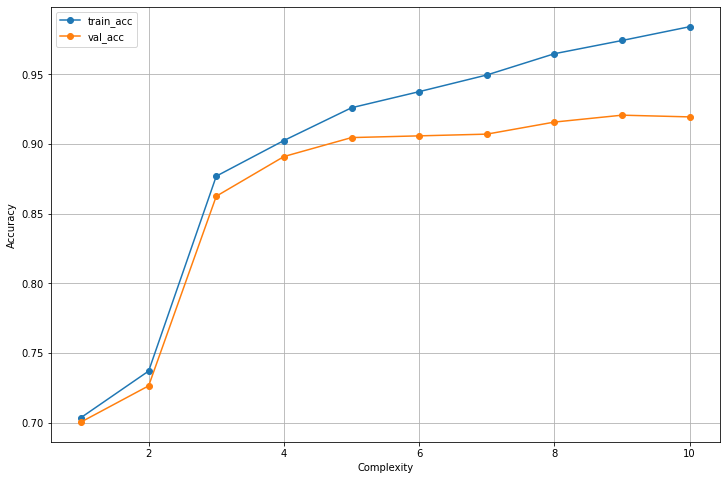

In [175]:
result_train = [] # train set을 가지고 예측한 결과
result_val = [] # val set을 가지고 예측한 결과
depth = list(range(1,11))

for d in depth :
    model3 = DecisionTreeClassifier(max_depth = d)
    model3.fit(x_train, y_train)
    pred_tr, pred_val = model3.predict(x_train), model3.predict(x_val)
    result_train.append(accuracy_score(y_train, pred_tr))
    result_val.append(accuracy_score(y_val, pred_val))
    
plt.figure(figsize = (12,8))
plt.plot(depth, result_train, label = 'train_acc', marker = 'o')
plt.plot(depth, result_val, label = 'val_acc', marker = 'o')

plt.xlabel('Complexity')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

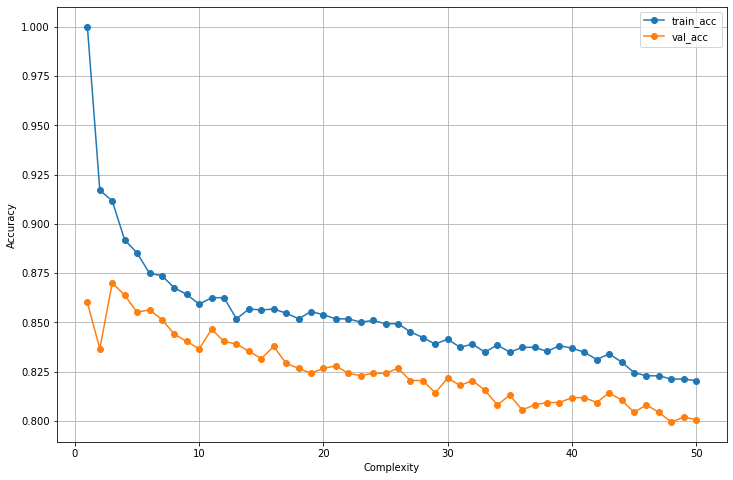

In [176]:
rs_train = []
rs_val = []
depth = list(range(1,51))

for d in depth :
    model = KNeighborsClassifier(n_neighbors=d)
    model.fit(x_train_s, y_train)
    pred_tr, pred_val = model.predict(x_train_s), model.predict(x_val_s)
    rs_train.append(accuracy_score(y_train, pred_tr))
    rs_val.append(accuracy_score(y_val, pred_val))
    
plt.figure(figsize = (12,8))
plt.plot(depth, rs_train, label = 'train_acc', marker = 'o')
plt.plot(depth, rs_val, label = 'val_acc', marker = 'o')

plt.xlabel('Complexity')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

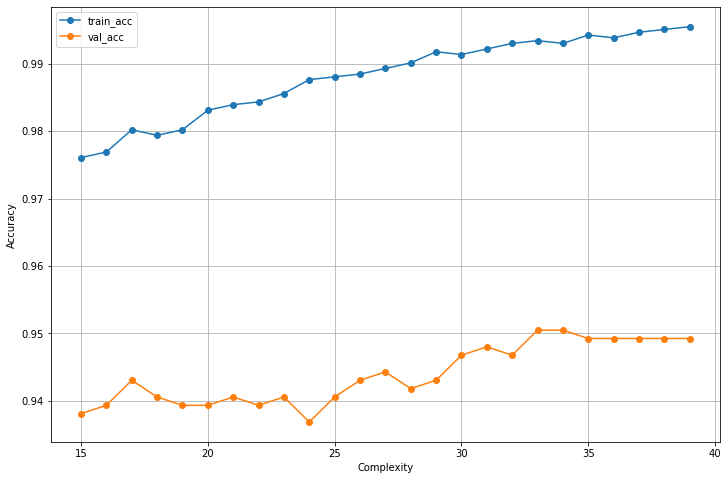

In [177]:
rs_train = []
rs_val = []
depth = list(range(15,40))
y_train.replace({-1:0}, inplace=True)
y_val.replace({-1:0}, inplace=True)
for d in depth :
    model = XGBClassifier(n_estimators = d)
    model.fit(x_train, y_train)
    pred_tr, pred_val = model.predict(x_train), model.predict(x_val)
    rs_train.append(accuracy_score(y_train, pred_tr))
    rs_val.append(accuracy_score(y_val, pred_val))
    
plt.figure(figsize = (12,8))
plt.plot(depth, rs_train, label = 'train_acc', marker = 'o')
plt.plot(depth, rs_val, label = 'val_acc', marker = 'o')

plt.xlabel('Complexity')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

y_train.replace({0:-1}, inplace=True)
y_val.replace({0:-1}, inplace=True)

In [178]:
params3 = {'n_neighbors' : range(17,25)}
model3 = GridSearchCV(KNeighborsClassifier(),params3, cv=10)

In [179]:
params4 = {'n_estimators' : range(16, 31)}
model4 = GridSearchCV(XGBClassifier(), params4, cv=10)

In [180]:
params5 = {'max_depth' : range(3, 8)}
model5 = GridSearchCV(DecisionTreeClassifier(), params5, cv=10)

In [181]:
model4_1 = XGBClassifier(n_estimators = 29)
y_train.replace({-1:0}, inplace=True)
model4_1.fit(x_train, y_train)
pred4_1 = model4_1.predict(x_val)
y_train.replace({0:-1}, inplace=True)

In [182]:
# 3. fit(), 학습
model1.fit(x_train, y_train)

LogisticRegression()

In [183]:
# 3. fit(), 학습
model2.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(3, 6),
                         'min_samples_leaf': range(1, 121, 5)})

In [184]:
model3.fit(x_train_s, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(17, 25)})

In [185]:
y_train.replace({-1:0}, inplace=True)
model4.fit(x_train, y_train)
y_train.replace({0:-1}, inplace=True)

In [186]:
model5.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(3, 8)})

In [187]:
print(model2.best_params_)
print(model2.best_score_)

{'max_depth': 5, 'min_samples_leaf': 1}
0.9248937183280619


In [188]:
print(model3.best_params_)
print(model3.best_score_)

{'n_neighbors': 17}
0.8374043464952556


In [189]:
print(model4.best_params_)
print(model4.best_score_)

{'n_estimators': 30}
0.9533653028602522


In [190]:
print(model5.best_params_)
print(model5.best_score_)

{'max_depth': 7}
0.9220062578648438


In [191]:
# 4. predict(), 예측
pred1 = model1.predict(x_val)

In [192]:
pred2 = model2.predict(x_val)

In [193]:
pred3 = model3.predict(x_val_s)

In [194]:
pred4 = model4.predict(x_val)

In [195]:
pred5 = model5.predict(x_val)

In [196]:
# train 및 val 데이터 정확도 확인 
print(accuracy_score(y_val,pred1))
print(accuracy_score(y_val,pred2))
print(accuracy_score(y_val,pred3))
y_val.replace({-1:0}, inplace=True)
print(accuracy_score(y_val,pred4))
print(accuracy_score(y_val,pred4_1))
y_val.replace({0:-1}, inplace=True)
print(accuracy_score(y_val,pred5))

0.844059405940594
0.9170792079207921
0.8292079207920792
0.9467821782178217
0.943069306930693
0.9096534653465347


In [197]:
# Test 데이터 결과 Confusion Matrix 확인
print(confusion_matrix(y_val, pred1))
print(classification_report(y_val, pred1))
print(confusion_matrix(y_val, pred2))
print(classification_report(y_val, pred2))
print(confusion_matrix(y_val, pred3))
print(classification_report(y_val, pred3))
y_val.replace({-1:0}, inplace=True)
print(confusion_matrix(y_val, pred4))
print(classification_report(y_val, pred4))
print(confusion_matrix(y_val, pred4_1))
print(classification_report(y_val, pred4_1))
y_val.replace({0:-1}, inplace=True)
print(confusion_matrix(y_val, pred5))
print(classification_report(y_val, pred5))

[[322  70]
 [ 56 360]]
              precision    recall  f1-score   support

          -1       0.85      0.82      0.84       392
           1       0.84      0.87      0.85       416

    accuracy                           0.84       808
   macro avg       0.84      0.84      0.84       808
weighted avg       0.84      0.84      0.84       808

[[352  40]
 [ 27 389]]
              precision    recall  f1-score   support

          -1       0.93      0.90      0.91       392
           1       0.91      0.94      0.92       416

    accuracy                           0.92       808
   macro avg       0.92      0.92      0.92       808
weighted avg       0.92      0.92      0.92       808

[[310  82]
 [ 56 360]]
              precision    recall  f1-score   support

          -1       0.85      0.79      0.82       392
           1       0.81      0.87      0.84       416

    accuracy                           0.83       808
   macro avg       0.83      0.83      0.83       808
weigh

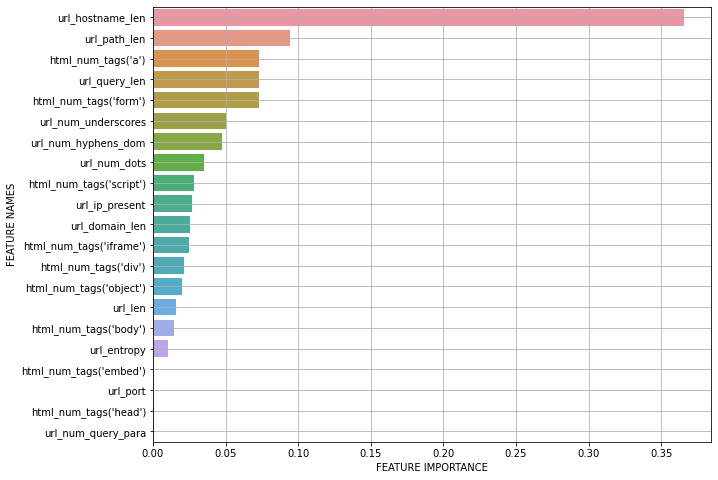

In [198]:
# Feature(특징)별 가중치 확인
result = plot_feature_importance(model4_1.feature_importances_, x_train.columns)


In [199]:
col = ['url_hostname_len','url_path_len','url_query_len',"html_num_tags('a')","html_num_tags('body')","html_num_tags('form')",'url_num_underscores']
x1 = x.loc[:, col]

In [200]:
x1.head()

,url_hostname_len,url_path_len,url_query_len,html_num_tags('a'),html_num_tags('body'),html_num_tags('form'),url_num_underscores
0,15.0,8.0,0.0,0.0,1.0,0.0,0.0
1,17.0,58.0,0.0,21.0,1.0,0.0,0.0
2,16.0,4.0,0.0,70.0,1.0,3.0,0.0
3,14.0,13.0,0.0,55.0,1.0,1.0,0.0
4,27.0,12.0,0.0,321.0,1.0,0.0,0.0


In [201]:
x_train1, x_val1, y_train, y_val = train_test_split(x1, y, test_size=.25)

In [202]:
Scaler = MinMaxScaler()
x_train_s1 = Scaler.fit_transform(x_train1)
x_val_s1 = Scaler.transform(x_val1)

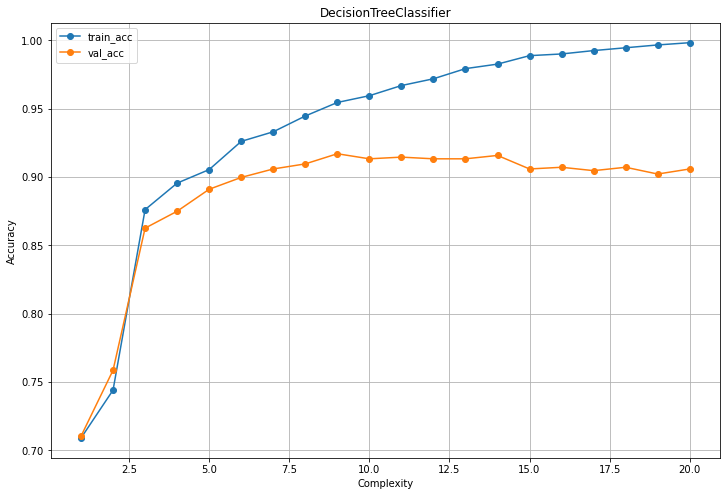

In [219]:
result_train = [] # train set을 가지고 예측한 결과
result_val = [] # val set을 가지고 예측한 결과
depth = list(range(1,21))

for d in depth :
    model = DecisionTreeClassifier(max_depth = d)
    model.fit(x_train1, y_train)
    pred_tr, pred_val = model.predict(x_train1), model.predict(x_val1)
    result_train.append(accuracy_score(y_train, pred_tr))
    result_val.append(accuracy_score(y_val, pred_val))
    
plt.figure(figsize = (12,8))
plt.plot(depth, result_train, label = 'train_acc', marker = 'o')
plt.plot(depth, result_val, label = 'val_acc', marker = 'o')

plt.title('DecisionTreeClassifier')
plt.xlabel('Complexity')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()
# 5~11

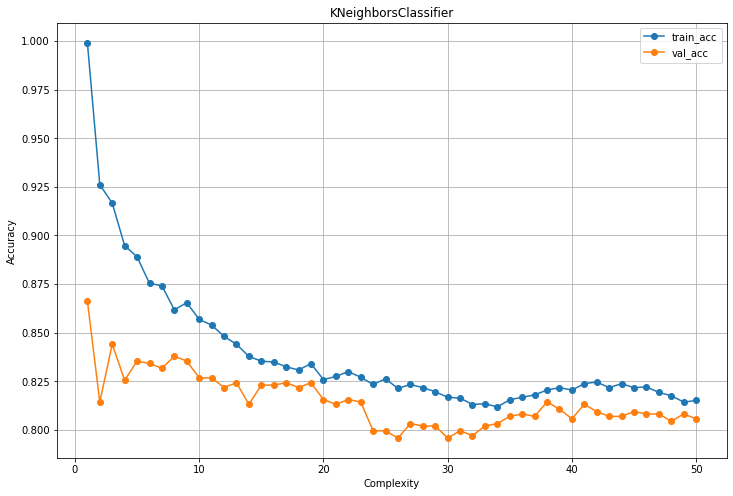

In [220]:
rs_train = []
rs_val = []
depth = list(range(1,51))

for d in depth :
    model = KNeighborsClassifier(n_neighbors=d)
    model.fit(x_train_s1, y_train)
    pred_tr, pred_val = model.predict(x_train_s1), model.predict(x_val_s1)
    rs_train.append(accuracy_score(y_train, pred_tr))
    rs_val.append(accuracy_score(y_val, pred_val))
    
plt.figure(figsize = (12,8))
plt.plot(depth, rs_train, label = 'train_acc', marker = 'o')
plt.plot(depth, rs_val, label = 'val_acc', marker = 'o')

plt.title('KNeighborsClassifier')
plt.xlabel('Complexity')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()
#15~35

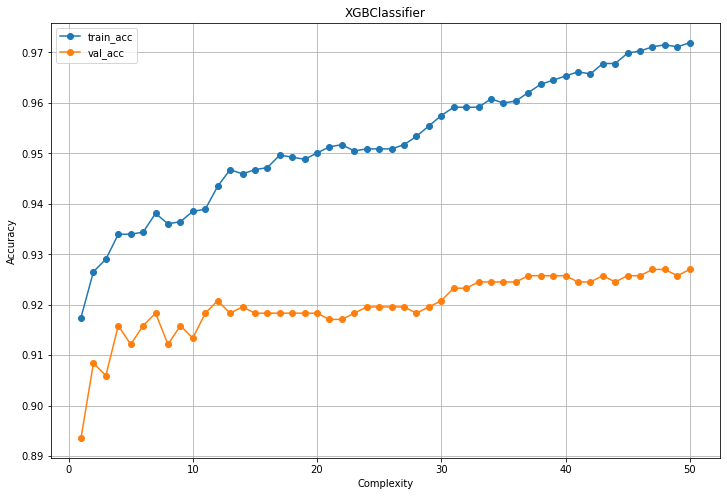

In [221]:
rs_train = []
rs_val = []
depth = list(range(1,51))
y_train.replace({-1:0}, inplace=True)
y_val.replace({-1:0}, inplace=True)
for d in depth :
    model = XGBClassifier(n_estimators = d)
    model.fit(x_train1, y_train)
    pred_tr, pred_val = model.predict(x_train1), model.predict(x_val1)
    rs_train.append(accuracy_score(y_train, pred_tr))
    rs_val.append(accuracy_score(y_val, pred_val))
    
plt.figure(figsize = (12,8))
plt.plot(depth, rs_train, label = 'train_acc', marker = 'o')
plt.plot(depth, rs_val, label = 'val_acc', marker = 'o')

plt.title('XGBClassifier')
plt.xlabel('Complexity')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

y_train.replace({0:-1}, inplace=True)
y_val.replace({0:-1}, inplace=True)
#8~16

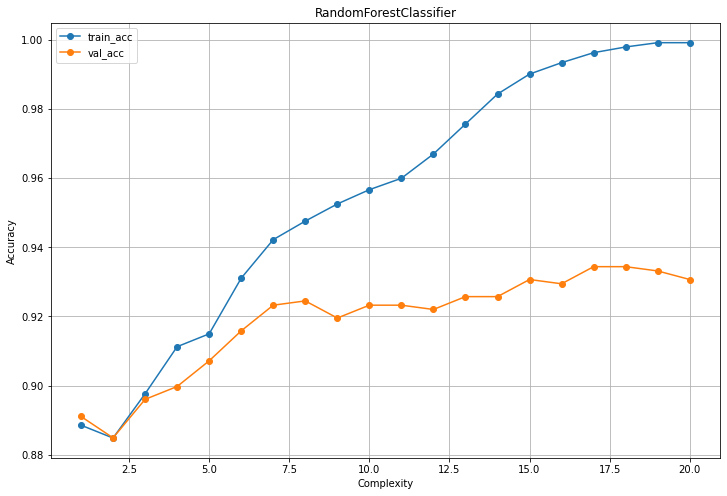

In [222]:
result_train = [] # train set을 가지고 예측한 결과
result_val = [] # val set을 가지고 예측한 결과
depth = list(range(1,21))

for d in depth :
    model = RandomForestClassifier(max_depth = d)
    model.fit(x_train1, y_train)
    pred_tr, pred_val = model.predict(x_train1), model.predict(x_val1)
    result_train.append(accuracy_score(y_train, pred_tr))
    result_val.append(accuracy_score(y_val, pred_val))
    
plt.figure(figsize = (12,8))
plt.plot(depth, result_train, label = 'train_acc', marker = 'o')
plt.plot(depth, result_val, label = 'val_acc', marker = 'o')

plt.title('RandomForestClassifier')
plt.xlabel('Complexity')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()
# 5~11

In [223]:
# 2.선언 
model1_1 = LogisticRegression()
model1_1.fit(x_train1, y_train)
pred1_1 = model1_1.predict(x_val1)

In [224]:
params2_1 = {'max_depth' : range(3,10)}
model2_1 = GridSearchCV(RandomForestClassifier(), params2_1, cv=10)
model2_1.fit(x_train1, y_train)
pred2_1 = model2_1.predict(x_val1)

In [225]:
params3_1 = {'n_neighbors' : range(15,36)}
model3_1 = GridSearchCV(KNeighborsClassifier(),params3_1, cv=10)
model3_1.fit(x_train_s1, y_train)
pred3_1 = model3_1.predict(x_val1)

In [226]:
params4_1 = {'max_depth' : range(5,12)}
model4_1 = GridSearchCV(DecisionTreeClassifier(),params4_1, cv=10)
model4_1.fit(x_train1, y_train)
pred4_1 = model4_1.predict(x_val1)

In [227]:
params5_2 = {'n_estimators' : range(8, 17)}
model5_2 = GridSearchCV(XGBClassifier(), params5_2, cv=10)
y_train.replace({-1:0}, inplace=True)
model5_2.fit(x_train1, y_train)
pred5_2 = model5_2.predict(x_val1)
y_train.replace({0:-1}, inplace=True)

In [228]:
print(model2_1.best_params_)
print(model2_1.best_score_)
print(model3_1.best_params_)
print(model3_1.best_score_)
print(model4_1.best_params_)
print(model4_1.best_score_)
print(model5_2.best_params_)
print(model5_2.best_score_)

{'max_depth': 9}
0.9290140461857634
{'n_neighbors': 23}
0.8151022004557358
{'max_depth': 10}
0.9199316396286094
{'n_estimators': 16}
0.9219960548243378


In [229]:
# train 및 val 데이터 정확도 확인 
print(accuracy_score(y_val,pred1_1)) # 로지스틱
print(accuracy_score(y_val,pred2_1)) # RandomForest
print(accuracy_score(y_val,pred3_1)) # KNN
print(accuracy_score(y_val,pred4_1)) # DecisionTree
y_val.replace({-1:0}, inplace=True)
print(accuracy_score(y_val,pred5_2)) # XGB
y_val.replace({0:-1}, inplace=True)

0.8155940594059405
0.9257425742574258
0.6794554455445545
0.9146039603960396
0.9183168316831684


In [213]:
#joblib.dump(model4, './XGB_model.pkl')

In [217]:
joblib.dump(model2_1, './RF_model.pkl')

['./RF_model.pkl']

In [215]:
#joblib.dump(model4_1, './XGB_model2.pkl')

In [218]:
joblib.dump(model5_2, './XGB_model3.pkl')

['./XGB_model3.pkl']